# Лабораторна робота №4. Дослiдження окремих блокiв та шарiв згорткових нейронних мереж

**Виконала** студентка групи КІ-51мп Додонова Марія

**Мета:** Навчитись використовувати та реалiзовувати спецiалiзованi блоки та шари для полiпшення архiтектур згорткових нейронних мереж. Дослiдити, як цi блоки впливають на точнiсть та ефективнiсть моделей, розроблених у попереднiх лабораторних роботах.

## Порядок виконання

1. Обрати одну з архiтектур, реалiзованих у лабораторнiй роботi №2 або №3 (наприклад, вашу власну просту CNN, VGG або ResNet), яка буде слугувати базовою моделлю для експериментiв. Використовуйте той самий датасет (Fashion MNIST, CIFAR-10) та пiдготовку даних.

2. Обрати 2-3 рiзних блоки (шари) для модифiкацiї обраної архiтектури зi списку:
* Squeeze-and-Excitation
* Attention (наприклад, CBAM)
* Dilated convolution
* Inception block
* Pointwise Convolution
* Будь-який iнший варiант зi списку.

3. Реалiзувати кожен обраний блок на вашому фреймворцi та iнтегрувати його в базову архiтектуру. Аргументуйте вибiр мiсця для iнтеграцiї (наприклад, "SE-блок додано пiсля кожного згорткового шару для калiбрування каналiв"). Ви повиннi отримати 2-3 модифiкованi архiтектури.

4. Навчити базову (якщо вона ще не навчена) та всi модифiкованi мережi на обраному датасетi. Слiдкуйте за тим, щоб умови навчання (кiлькiсть епох, оптимiзатор, швидкiсть навчання) були однаковими для коректного порiвняння.

5. Проаналiзувати результати. Порiвняйте графiки навчання та фiнальнi метрики (точнiсть, функцiя втрат) для всiх моделей. Оцiнiть, як доданi блоки вплинули на точнiсть, швидкiсть збiжностi та час навчання.

## Виконання роботи

### 1. Обрати одну з архiтектур, реалiзованих у лабораторнiй роботi №2 або №3 (наприклад, вашу власну просту CNN, VGG або ResNet), яка буде слугувати базовою моделлю для експериментiв. Використовуйте той самий датасет (Fashion MNIST, CIFAR-10) та пiдготовку даних.

### 2. Обрати 2-3 рiзних блоки (шари) для модифiкацiї обраної архiтектури зi списку:
* Squeeze-and-Excitation
* Attention (наприклад, CBAM)
* Dilated convolution
* Inception block
* Pointwise Convolution
* Будь-який iнший варiант зi списку.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

from src.models.vggnet import VGG13SE, VGG13CBAM
from src.trainer import Trainer
from src.plot_tools import plot_history

DATA_PATH = "data"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_EPOCHS = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.001
REDUCTION = 16

print(f"Using device: {DEVICE}")

Using device: cuda


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

# Load train split
train_dataset = datasets.CIFAR10(
    root=DATA_PATH,
    train=True,
    download=True,
    transform=transform
)

# Load test split
test_dataset = datasets.CIFAR10(
    root=DATA_PATH,
    train=False,
    download=True,
    transform=transform
)

# Split train into train and validation
train_dataset, val_dataset = random_split(train_dataset, [0.8, 0.2])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, pin_memory=True, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, pin_memory=True)

### 3. Реалiзувати кожен обраний блок на вашому фреймворцi та iнтегрувати його в базову архiтектуру. Аргументуйте вибiр мiсця для iнтеграцiї (наприклад, "SE-блок додано пiсля кожного згорткового шару для калiбрування каналiв"). Ви повиннi отримати 2-3 модифiкованi архiтектури.

### 4. Навчити базову (якщо вона ще не навчена) та всi модифiкованi мережi на обраному датасетi. Слiдкуйте за тим, щоб умови навчання (кiлькiсть епох, оптимiзатор, швидкiсть навчання) були однаковими для коректного порiвняння.

In [3]:
criterion = nn.CrossEntropyLoss()

print("Training VGG13SE:")
vgg_se_model = VGG13SE(in_channels=3, num_classes=10, reduction=REDUCTION)
vgg_se_optimizer = optim.Adam(vgg_se_model.parameters(), lr=LEARNING_RATE)
vgg_se_trainer = Trainer(vgg_se_model, vgg_se_optimizer, criterion, device=DEVICE)
vgg_se_history = vgg_se_trainer.train(NUM_EPOCHS, train_loader, val_loader)
print("Test results:", end=" ")
vgg_se_trainer.test(test_loader)

print("\nTraining VGG13CBAM:")
vgg_cbam_model = VGG13CBAM(in_channels=3, num_classes=10, reduction=REDUCTION)
vgg_cbam_optimizer = optim.Adam(vgg_cbam_model.parameters(), lr=LEARNING_RATE)
vgg_cbam_trainer = Trainer(vgg_cbam_model, vgg_cbam_optimizer, criterion, device=DEVICE)
vgg_cbam_history = vgg_cbam_trainer.train(NUM_EPOCHS, train_loader, val_loader)
print("Test results:", end=" ")
vgg_cbam_trainer.test(test_loader)

print("\nFinished Training!")


Training VGG13SE:
Epoch [ 1/10]: Train Loss: 2.0320, Val Loss: 1.8234, Train Accuracy: 0.2076, Val Accuracy: 0.2820.
Epoch [ 2/10]: Train Loss: 1.6530, Val Loss: 1.5126, Train Accuracy: 0.3522, Val Accuracy: 0.4142.
Epoch [ 3/10]: Train Loss: 1.3756, Val Loss: 1.3094, Train Accuracy: 0.4827, Val Accuracy: 0.5242.
Epoch [ 4/10]: Train Loss: 1.1483, Val Loss: 1.1397, Train Accuracy: 0.5892, Val Accuracy: 0.5909.
Epoch [ 5/10]: Train Loss: 0.9786, Val Loss: 1.0254, Train Accuracy: 0.6556, Val Accuracy: 0.6449.
Epoch [ 6/10]: Train Loss: 0.8665, Val Loss: 0.8884, Train Accuracy: 0.6978, Val Accuracy: 0.6820.
Epoch [ 7/10]: Train Loss: 0.7555, Val Loss: 0.8726, Train Accuracy: 0.7385, Val Accuracy: 0.6945.
Epoch [ 8/10]: Train Loss: 0.6937, Val Loss: 0.8585, Train Accuracy: 0.7608, Val Accuracy: 0.7052.
Epoch [ 9/10]: Train Loss: 0.6090, Val Loss: 0.8544, Train Accuracy: 0.7931, Val Accuracy: 0.7202.
Epoch [10/10]: Train Loss: 0.5393, Val Loss: 0.8748, Train Accuracy: 0.8126, Val Accuracy:

### 5. Проаналiзувати результати. Порiвняйте графiки навчання та фiнальнi метрики (точнiсть, функцiя втрат) для всiх моделей. Оцiнiть, як доданi блоки вплинули на точнiсть, швидкiсть збiжностi та час навчання.

VGG13SE Curves


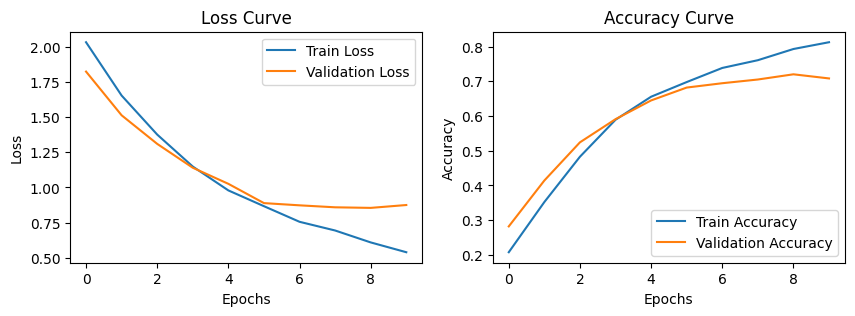

VGG13CBAM Curves


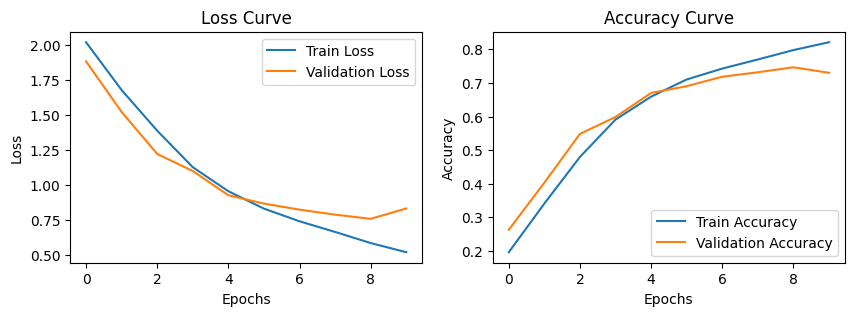

In [4]:
print("VGG13SE Curves")
plot_history(vgg_se_history)

print("VGG13CBAM Curves")
plot_history(vgg_cbam_history)

## Висновок

В ході виконання роботи було завантажено, передоброблено та розділено датасет CIFAR-10 на тренувальну, валідаційну та тестову вибірки, реалізовано блоки Squeeze and Excitation (SEBlock) та Convolutional Block Attention Module (CBAM) та модифіковано архітектуру згорткових нейронних мереж VGG13. Було навчено отримані мережі на завантаженому датасеті та побудовано графіки навчання.

У мережі VGG13SE блоки SEBlock було розташовано між згортковими блоками VGG13. Аналогічним чином було розташовано блоки CBAM у мережі VGG13CBAM. Таке розташування дозволяє калібрувати канали у випадку SEBlock та звертати увагу на важливі сегменти (CBAM). Для уникнення зайвого ускладнення архітектури, модифікаційні блоки додавались після згорткових блоків VGG13, а не після її згорткових шарів.

Найкраще значення точності на тестовому датасеті демонструє VGG13CBAM, хоча її результат не набагато випереджає результат VGG13. Графіки історії навчання демонструють пізніший прояв перенавчання для модифікованих мереж. Це свідчить про те, що застосування блоків SEBlock та CBAM збільшило час збіжності нейромережі через більшу кількість параметрів. Але датасет все ще є занадто простим для складності використаної архітектури, тому спостерігається перенавчання. 